In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Correlation, to be used to find lag between waves
from scipy.signal import correlate

# Just define some nice colours
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

## Read all the data, and combine into one dataframe

In [6]:
headers = ['Time', 'Counter', 'Status', 'vx', 'vy', 'vz1', 'vz2', 'ax', 'ay', 'az1', 'az2',  'SNRx', 'SNRy', 'SNRz1', 'SNRz2', 'cx', 'cy', 'cz1', 'rz2']

df1 = pd.read_csv('t20221104135008.dat', delim_whitespace=True, names=headers)
df2 = pd.read_csv('t20221104145008.dat', delim_whitespace=True, names=headers)
df3 = pd.read_csv('t20221104155008.dat', delim_whitespace=True, names=headers)

df = pd.concat([df1, df2, df3])

## Find lag between waves

We know:
* The lag is approximately 2 min 4 s
* The sample rate is 100 Hz

Use this information to search for lag in the relevant region

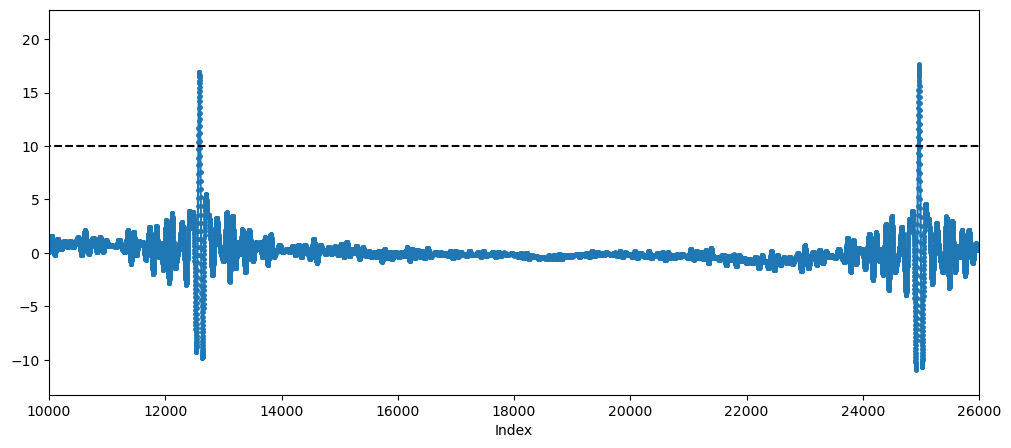

In [61]:
# Approximate duration of wave
Napprox = (2*60 + 4)*100
# Pick out (approximately) first three waves
sample = df['vz1'].iloc[:3*Napprox]

# Calculate cross-correlation with the first 14 waves
corr = correlate(sample, df['vz1'].iloc[:14*Napprox], mode='valid')

# Plot correlation
fig = plt.figure(figsize=(12,5))
plt.plot(corr, marker='.', markersize=5)

# Limit the range to see what is going on
plt.xlim(10000, 26000)
plt.xlabel('Index')

# Introduce a threshold to make it easier to find peaks
thresh = 10
plt.plot([0, len(corr)], [thresh, thresh], '--', c='k')

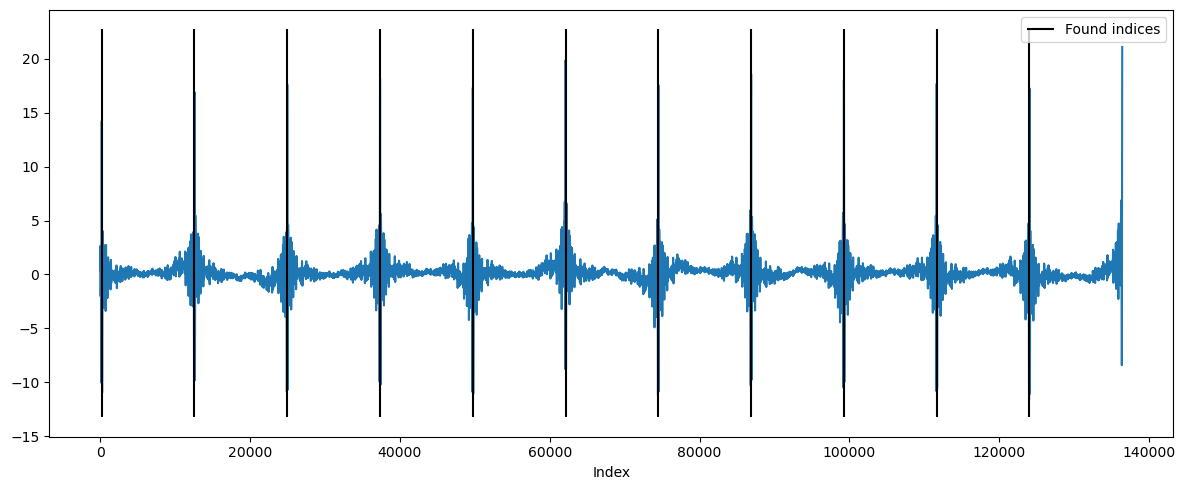

In [62]:
# Search for the maxima in correlation, but only above threshold
cmax = 0
indices = []
for i in range(len(corr)):
    if corr[i] < thresh:
        cmax = 0
    else:
        if corr[i] > cmax:
            cmax = corr[i]
            ind  = i
        else:
            indices.append(ind)

# Remove duplicate entries
indices = sorted(set(indices))

fig = plt.figure(figsize=(12,5))
plt.plot(corr)
plt.vlines(indices, *plt.ylim(), colors='k', label='Found indices')
# Limit the range to see what is going on
plt.xlabel('Index')
plt.legend()
plt.tight_layout()

## Look at spacing between peaks

In [63]:
# Print spacing between peaks
for i in range(len(indices)-1):
    print(indices[i+1]-indices[i])

12380
12382
12382
12381
12382
12382
12381
12381
12382
12382


## Plot waves to see if the peaks match up

Based on the numbers above, the lag between waves seems to be either 12381 points or 12382 points. Going with the average value of 12381.5 points or 2 minutes and 3.815 seconds

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


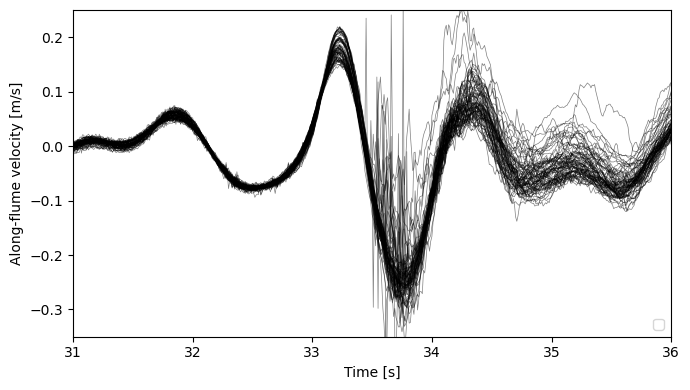

In [64]:
duration = 123.815
Npoints = duration * 100

# Approximate number of waves in full dataset
Nwaves = int(len(df)/Npoints)


fig = plt.figure(figsize=(7,4))
for i in range(Nwaves):
    # Round indices to integers
    istart = int(i*Npoints)
    istop  = int((i+1)*Npoints)
    # Create a time-axis with correct number of points
    t = np.arange(0, (istop-istart)) / 100
    plt.plot(t, df['vz1'].iloc[istart:istop].values, c='k', lw=0.5, alpha=0.5)

plt.xlabel('Time [s]')
plt.ylabel('Along-flume velocity [m/s]')
plt.xlim(31, 36)
plt.ylim(-0.35, 0.25)
plt.tight_layout()
plt.savefig('all_waves_zoom.png', dpi=180)

## Same as above, but coloured according to ADV depth

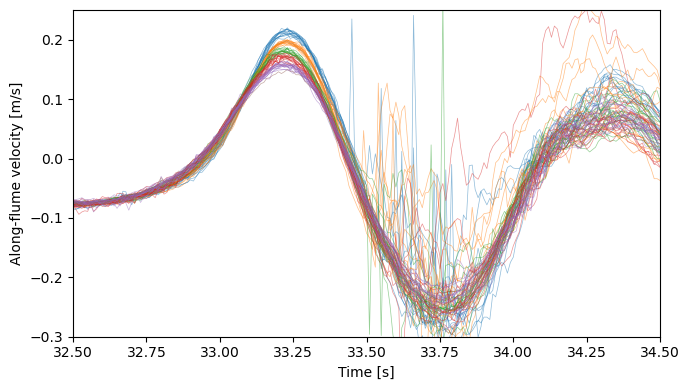

In [74]:
duration = 123.815
Npoints = duration * 100

# Approximate number of waves in full dataset
Nwaves = int(len(df)/Npoints)

# Number of measurements at each ADV position (approximate)
# 1800 seconds at each position, 100 Hz
Npoints_per_depth = 1800 * 100

fig = plt.figure(figsize=(7,4))
for i in range(Nwaves):
    # Find the 'depth index'
    j = int(i*Npoints / Npoints_per_depth)
    
    # Round indices to integers
    istart = int(i*Npoints)
    istop  = int((i+1)*Npoints)
    # Create a time-axis with correct number of points
    t = np.arange(0, (istop-istart)) / 100
    plt.plot(t, df['vz1'].iloc[istart:istop].values, c=colours[j], lw=0.5, alpha=0.5)

plt.xlabel('Time [s]')
plt.ylabel('Along-flume velocity [m/s]')
plt.xlim(32.5, 34.5)
plt.ylim(-0.3, 0.25)
plt.tight_layout()
plt.savefig('all_waves_zoom_coloured.png', dpi=180)